In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

mpl.font_manager._rebuild()
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls '/content/drive/My Drive/Colab Notebooks/데이터 사이언스 입문/Data'

2000년.csv  2005년.csv	2010년.csv  2015년.csv	       seoul_crime_result.csv
2001년.csv  2006년.csv	2011년.csv  2016년.csv
2002년.csv  2007년.csv	2012년.csv  2017년.csv
2003년.csv  2008년.csv	2013년.csv  2018년.csv
2004년.csv  2009년.csv	2014년.csv  crime_station.csv


## 서울시 범죄 현황 데이터 읽기

In [0]:
import numpy as np
import pandas as pd

In [5]:
main_url = '/content/drive/My Drive/Colab Notebooks/데이터 사이언스 입문/Data'
crime_raw_data = pd.read_csv(main_url+'/2018년.csv', encoding='euc-kr')
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,5
3,중부,강도,검거,7
4,중부,강간,발생,132


In [6]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
구분      310 non-null object
죄종      310 non-null object
발생검거    310 non-null object
건수      310 non-null int64
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [7]:
crime_raw_data['죄종'].unique()

array(['살인', '강도', '강간', '절도', '폭력'], dtype=object)

In [8]:
crime_raw_data = crime_raw_data[crime_raw_data['죄종'].notnull()]
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 4 columns):
구분      310 non-null object
죄종      310 non-null object
발생검거    310 non-null object
건수      310 non-null int64
dtypes: int64(1), object(3)
memory usage: 12.1+ KB


In [9]:
crime_raw_data

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,5
3,중부,강도,검거,7
4,중부,강간,발생,132
...,...,...,...,...
305,수서,강간,검거,171
306,수서,절도,발생,984
307,수서,절도,검거,481
308,수서,폭력,발생,1697


## Pivot_table 기초

In [0]:
import pandas as pd
import numpy as np

In [11]:
git_base_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/'
df = pd.read_excel(git_base_url+'dataset/sales-funnel.xlsx')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [12]:
pd.pivot_table(df,index=["Name"])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [13]:
pd.pivot_table(df,index=["Name","Rep","Manager"])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [14]:
pd.pivot_table(df,index=["Manager","Rep"])

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

In [15]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [16]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [17]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=[np.mean,len])

mean   len
                                    Price Price
Manager       Rep                              
Debra Henley  Craig Booker   20000.000000     4
              Daniel Hilton  38333.333333     3
              John Smith     20000.000000     2
Fred Anderson Cedric Moss    27500.000000     4
              Wendy Yule     44250.000000     4

In [18]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],
               columns=["Product"],aggfunc=[np.sum])

sum                             
                                Price                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

In [19]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],
               columns=["Product"],aggfunc=[np.sum],fill_value=0)

sum                             
                              Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

In [20]:
pd.pivot_table(df,index=["Manager","Rep","Product"],
               values=["Price","Quantity"],aggfunc=[np.sum],fill_value=0)

sum         
                                          Price Quantity
Manager       Rep           Product                     
Debra Henley  Craig Booker  CPU           65000        2
                            Maintenance    5000        2
                            Software      10000        1
              Daniel Hilton CPU          105000        4
                            Software      10000        1
              John Smith    CPU           35000        1
                            Maintenance    5000        2
Fred Anderson Cedric Moss   CPU           95000        3
                            Maintenance    5000        1
                            Software      10000        1
              Wendy Yule    CPU          165000        7
                            Maintenance    7000        3
                            Monitor        5000        2

In [21]:
pd.pivot_table(df,index=["Manager","Rep","Product"],
               values=["Price","Quantity"],
               aggfunc=[np.sum,np.mean],fill_value=0,margins=True)

sum            mean          
                                          Price Quantity  Price  Quantity
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500  1.000000
                            Maintenance    5000        2   5000  2.000000
                            Software      10000        1  10000  1.000000
              Daniel Hilton CPU          105000        4  52500  2.000000
                            Software      10000        1  10000  1.000000
              John Smith    CPU           35000        1  35000  1.000000
                            Maintenance    5000        2   5000  2.000000
Fred Anderson Cedric Moss   CPU           95000        3  47500  1.500000
                            Maintenance    5000        1   5000  1.000000
                            Software      10000        1  10000  1.000000
              Wendy Yule    CPU          165000        7  82500  3.500000
                            Maintenance    7000        3   7000  3.000000
                            Monitor        5000        2   5000  2.000000
All                                      522000       30  30705  1.764706

## Pivot_table을 이용한 데이터 정리 

In [22]:
import pandas as pd

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종','발생검거'], aggfunc=np.sum)

crime_station.head()

건수                                            
죄종     강간       강도     살인        절도          폭력      
발생검거   검거   발생  검거  발생 검거  발생    검거    발생    검거    발생
구분                                                   
강남    352  406   8   9  8   5   836  2020  1890  2188
강동    143  170   7   7  3   3   765  1515  1871  2224
강북    135  188   7   7  6   8   603  1112  1992  2122
강서    246  269   3   6  9  11   982  1724  2229  2619
관악    305  352  12  10  9   9  1025  2012  2302  2643

In [23]:
crime_station.columns

MultiIndex([('건수', '강간', '검거'),
            ('건수', '강간', '발생'),
            ('건수', '강도', '검거'),
            ('건수', '강도', '발생'),
            ('건수', '살인', '검거'),
            ('건수', '살인', '발생'),
            ('건수', '절도', '검거'),
            ('건수', '절도', '발생'),
            ('건수', '폭력', '검거'),
            ('건수', '폭력', '발생')],
           names=[None, '죄종', '발생검거'])

In [24]:
crime_station.columns = crime_station.columns.droplevel([0])
crime_station.columns

MultiIndex([('강간', '검거'),
            ('강간', '발생'),
            ('강도', '검거'),
            ('강도', '발생'),
            ('살인', '검거'),
            ('살인', '발생'),
            ('절도', '검거'),
            ('절도', '발생'),
            ('폭력', '검거'),
            ('폭력', '발생')],
           names=['죄종', '발생검거'])

In [25]:
crime_station['강도','검거']

구분
강남      8
강동      7
강북      7
강서      3
관악     12
광진      1
구로      9
금천      6
남대문     4
노원      5
도봉      3
동대문     4
동작      7
마포      7
방배      1
서대문     3
서부      0
서초      4
성동      8
성북      0
송파      8
수서      2
양천     14
영등포     6
용산      2
은평      1
종로      0
종암      2
중랑      3
중부      7
혜화      2
Name: (강도, 검거), dtype: int64

In [26]:
crime_station['살인','발생']

구분
강남      5
강동      3
강북      8
강서     11
관악      9
광진      7
구로      8
금천      6
남대문     1
노원      5
도봉      1
동대문     2
동작      3
마포      6
방배      0
서대문     5
서부      4
서초      5
성동      2
성북      1
송파      5
수서      5
양천      2
영등포    17
용산      1
은평      4
종로      5
종암      6
중랑      4
중부      1
혜화      1
Name: (살인, 발생), dtype: int64

In [27]:
crime_station.head()

죄종     강간       강도     살인        절도          폭력      
발생검거   검거   발생  검거  발생 검거  발생    검거    발생    검거    발생
구분                                                   
강남    352  406   8   9  8   5   836  2020  1890  2188
강동    143  170   7   7  3   3   765  1515  1871  2224
강북    135  188   7   7  6   8   603  1112  1992  2122
강서    246  269   3   6  9  11   982  1724  2229  2619
관악    305  352  12  10  9   9  1025  2012  2302  2643

In [28]:
crime_station.loc['강남',('강도','발생')]

9

In [29]:
tmp = crime_station.columns.get_level_values(0) + \
        crime_station.columns.get_level_values(1)
tmp

Index(['강간검거', '강간발생', '강도검거', '강도발생', '살인검거', '살인발생', '절도검거', '절도발생', '폭력검거',
       '폭력발생'],
      dtype='object')

In [30]:
crime_station.columns = tmp
crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,352,406,8,9,8,5,836,2020,1890,2188
강동,143,170,7,7,3,3,765,1515,1871,2224
강북,135,188,7,7,6,8,603,1112,1992,2122
강서,246,269,3,6,9,11,982,1724,2229,2619
관악,305,352,12,10,9,9,1025,2012,2302,2643


In [31]:
crime_station

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,352,406,8,9,8,5,836,2020,1890,2188
강동,143,170,7,7,3,3,765,1515,1871,2224
강북,135,188,7,7,6,8,603,1112,1992,2122
강서,246,269,3,6,9,11,982,1724,2229,2619
관악,305,352,12,10,9,9,1025,2012,2302,2643
광진,184,229,1,2,5,7,974,1769,1625,1908
구로,181,250,9,9,8,8,787,1717,2353,2826
금천,185,200,6,7,6,6,645,1168,1725,1912
남대문,52,75,4,6,1,1,417,798,709,779


In [32]:
crime_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 강남 to 혜화
Data columns (total 10 columns):
강간검거    31 non-null int64
강간발생    31 non-null int64
강도검거    31 non-null int64
강도발생    31 non-null int64
살인검거    31 non-null int64
살인발생    31 non-null int64
절도검거    31 non-null int64
절도발생    31 non-null int64
폭력검거    31 non-null int64
폭력발생    31 non-null int64
dtypes: int64(10)
memory usage: 3.9+ KB


## Dict 기초

In [33]:
dict_sample = {'Name': 'Zara', 'Age': 7, 'Class': 'First'}
dict_sample.keys()

dict_keys(['Name', 'Age', 'Class'])

In [34]:
dict_sample.values()

dict_values(['Zara', 7, 'First'])

In [35]:
dict_sample['Name']

'Zara'

In [36]:
dict_sample.get('Age')

7

In [0]:
real_gu = {'종로구' : ['종로', '혜화'], 
           '중구' : ['남대문', '중부'], 
           '용산구' : ['용산'], 
           '성동구' : ['성동'], 
           '광진구' : ['광진'], 
           '동대문구' : ['동대문'], 
           '중랑구' : ['중랑'], 
           '성북구' : ['성북', '종암'], 
           '강북구' : ['강북'], 
           '도봉구' : ['도봉'], 
           '노원구' : ['노원'], 
           '은평구' : ['서부', '은평'], 
           '서대문구' : ['서대문'], 
           '마포구' : ['마포'], 
           '양천구' : ['양천'], 
           '강서구' : ['강서'], 
           '구로구' : ['구로'], 
           '금천구' : ['금천'], 
           '영등포구' : ['영등포'], 
           '동작구' : ['동작'], 
           '관악구' : ['관악'], 
           '서초구' : ['방배', '서초'], 
           '강남구' : ['강남', '수서'], 
           '송파구' : ['송파'], 
           '강동구' : ['강동']}

In [38]:
for gu_name, station_name in real_gu.items():    
    if '강남' in station_name:
        print(gu_name)

강남구


In [39]:
tmp_gu = []

for station in crime_station.index:
    for gu_name, station_name in real_gu.items():
        if station in station_name:
            tmp_gu.append(gu_name)
            
tmp_gu

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '중구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서초구',
 '서대문구',
 '은평구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '강남구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '성북구',
 '중랑구',
 '중구',
 '종로구']

In [40]:
crime_station['구'] = tmp_gu
crime_station

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구
구분,,,,,,,,,,,
강남,352,406,8,9,8,5,836,2020,1890,2188,강남구
강동,143,170,7,7,3,3,765,1515,1871,2224,강동구
강북,135,188,7,7,6,8,603,1112,1992,2122,강북구
강서,246,269,3,6,9,11,982,1724,2229,2619,강서구
관악,305,352,12,10,9,9,1025,2012,2302,2643,관악구
광진,184,229,1,2,5,7,974,1769,1625,1908,광진구
구로,181,250,9,9,8,8,787,1717,2353,2826,구로구
금천,185,200,6,7,6,6,645,1168,1725,1912,금천구
남대문,52,75,4,6,1,1,417,798,709,779,중구


In [41]:
crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구
구분,,,,,,,,,,,
강남,352,406,8,9,8,5,836,2020,1890,2188,강남구
강동,143,170,7,7,3,3,765,1515,1871,2224,강동구
강북,135,188,7,7,6,8,603,1112,1992,2122,강북구
강서,246,269,3,6,9,11,982,1724,2229,2619,강서구
관악,305,352,12,10,9,9,1025,2012,2302,2643,관악구


In [0]:
crime_station.to_csv(main_url+'/crime_station.csv', sep=',', encoding='UTF-8')

In [43]:
crime_gu = pd.pivot_table(crime_station, index='구', aggfunc=np.sum)

crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,523,600,10,14,13,10,1317,3004,3333,3885
강동구,143,170,7,7,3,3,765,1515,1871,2224
강북구,135,188,7,7,6,8,603,1112,1992,2122
강서구,246,269,3,6,9,11,982,1724,2229,2619
관악구,305,352,12,10,9,9,1025,2012,2302,2643


In [44]:
crime_gu['살인발생'].sort_values(ascending=False).head()

구
영등포구    17
강서구     11
강남구     10
관악구      9
강북구      8
Name: 살인발생, dtype: int64

In [45]:
crime_gu['폭력발생'].sort_values(ascending=False).head()

구
강남구     3885
송파구     3135
영등포구    3132
구로구     2826
마포구     2676
Name: 폭력발생, dtype: int64

In [46]:
crime_gu['강도발생'].sort_values(ascending=False).head()

구
강남구     14
중구      11
관악구     10
구로구      9
영등포구     8
Name: 강도발생, dtype: int64

In [47]:
crime_gu['절도발생'].sort_values(ascending=False).head()

구
강남구     3004
송파구     2352
영등포구    2292
관악구     2012
마포구     2011
Name: 절도발생, dtype: int64

In [48]:
crime_gu['강간발생'].sort_values(ascending=False).head()

구
강남구     600
마포구     473
서초구     470
영등포구    391
관악구     352
Name: 강간발생, dtype: int64

In [49]:
crime_gu['강도검거']/crime_gu['강도발생']

구
강남구     0.714286
강동구     1.000000
강북구     1.000000
강서구     0.500000
관악구     1.200000
광진구     0.500000
구로구     1.000000
금천구     0.857143
노원구     1.000000
도봉구     0.600000
동대문구    0.800000
동작구     1.000000
마포구     1.166667
서대문구    1.000000
서초구     1.000000
성동구     1.600000
성북구     2.000000
송파구     1.333333
양천구     3.500000
영등포구    0.750000
용산구     0.666667
은평구     1.000000
종로구     0.666667
중구      1.000000
중랑구     1.000000
dtype: float64

In [50]:
crime_gu[['강도검거', '살인검거']].div(crime_gu['강도발생'], axis=0)

,강도검거,살인검거
구,,
강남구,0.714286,0.928571
강동구,1.000000,0.428571
강북구,1.000000,0.857143
강서구,0.500000,1.500000
관악구,1.200000,0.900000
광진구,0.500000,2.500000
구로구,1.000000,0.888889
금천구,0.857143,0.857143
노원구,1.000000,0.800000


In [51]:
num = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
den = ['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']

crime_gu[num].div(crime_gu[den].values)

,강간검거,강도검거,살인검거,절도검거,폭력검거
구,,,,,
강남구,0.871667,0.714286,1.300000,0.438415,0.857915
강동구,0.841176,1.000000,1.000000,0.504950,0.841277
강북구,0.718085,1.000000,0.750000,0.542266,0.938737
강서구,0.914498,0.500000,0.818182,0.569606,0.851088
관악구,0.866477,1.200000,1.000000,0.509443,0.870980
광진구,0.803493,0.500000,0.714286,0.550594,0.851677
구로구,0.724000,1.000000,1.000000,0.458358,0.832626
금천구,0.925000,0.857143,1.000000,0.552226,0.902197
노원구,0.891753,1.000000,0.800000,0.411392,0.822344


In [52]:
target = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
num = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
den = ['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']

crime_gu[target] = crime_gu[num].div(crime_gu[den].values)*100
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,523,600,10,14,13,10,1317,3004,3333,3885,87.166667,71.428571,130.000000,43.841545,85.791506
강동구,143,170,7,7,3,3,765,1515,1871,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,135,188,7,7,6,8,603,1112,1992,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,246,269,3,6,9,11,982,1724,2229,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,305,352,12,10,9,9,1025,2012,2302,2643,86.647727,120.000000,100.000000,50.944334,87.097995


In [53]:
crime_gu = crime_gu.drop(columns=num)
crime_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,130.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,352,10,9,2012,2643,86.647727,120.000000,100.000000,50.944334,87.097995


In [54]:
crime_gu[target] > 100

,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,
강남구,False,False,True,False,False
강동구,False,False,False,False,False
강북구,False,False,False,False,False
강서구,False,False,False,False,False
관악구,False,True,False,False,False
광진구,False,False,False,False,False
구로구,False,False,False,False,False
금천구,False,False,False,False,False
노원구,False,False,False,False,False


In [55]:
crime_gu[crime_gu[target] > 100] = 100
crime_gu

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,352,10,9,2012,2643,86.647727,100.000000,100.000000,50.944334,87.097995
광진구,229,2,7,1769,1908,80.349345,50.000000,71.428571,55.059356,85.167715
구로구,250,9,8,1717,2826,72.400000,100.000000,100.000000,45.835760,83.262562
금천구,200,7,6,1168,1912,92.500000,85.714286,100.000000,55.222603,90.219665
노원구,194,5,5,1422,2381,89.175258,100.000000,80.000000,41.139241,82.234355


In [56]:
crime_gu.rename(columns = {'강간발생':'강간', 
                           '강도발생':'강도', 
                           '살인발생':'살인', 
                           '절도발생':'절도', 
                           '폭력발생':'폭력'}, 
                inplace=True)
crime_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,352,10,9,2012,2643,86.647727,100.000000,100.000000,50.944334,87.097995


In [57]:
col = ['살인', '강도', '강간', '절도', '폭력']
crime_gu_norm = crime_gu[col] / crime_gu[col].max()
crime_gu_norm.head()

,살인,강도,강간,절도,폭력
구,,,,,
강남구,0.588235,1.000000,1.000000,1.000000,1.000000
강동구,0.176471,0.500000,0.283333,0.504328,0.572458
강북구,0.470588,0.500000,0.313333,0.370173,0.546203
강서구,0.647059,0.428571,0.448333,0.573901,0.674131
관악구,0.529412,0.714286,0.586667,0.669774,0.680309


In [58]:
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_gu_norm[col2] = crime_gu[col2]
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,0.588235,1.000000,1.000000,1.000000,1.000000,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,0.176471,0.500000,0.283333,0.504328,0.572458,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,0.470588,0.500000,0.313333,0.370173,0.546203,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,0.647059,0.428571,0.448333,0.573901,0.674131,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,0.529412,0.714286,0.586667,0.669774,0.680309,86.647727,100.000000,100.000000,50.944334,87.097995


In [59]:
col = ['강간','강도','살인','절도','폭력']
crime_gu_norm['범죄'] = np.mean(crime_gu_norm[col], axis=1)
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄
구,,,,,,,,,,,
강남구,0.588235,1.000000,1.000000,1.000000,1.000000,87.166667,71.428571,100.000000,43.841545,85.791506,0.917647
강동구,0.176471,0.500000,0.283333,0.504328,0.572458,84.117647,100.000000,100.000000,50.495050,84.127698,0.407318
강북구,0.470588,0.500000,0.313333,0.370173,0.546203,71.808511,100.000000,75.000000,54.226619,93.873704,0.440060
강서구,0.647059,0.428571,0.448333,0.573901,0.674131,91.449814,50.000000,81.818182,56.960557,85.108820,0.554399
관악구,0.529412,0.714286,0.586667,0.669774,0.680309,86.647727,100.000000,100.000000,50.944334,87.097995,0.636089


In [60]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_gu_norm['검거'] = np.mean(crime_gu_norm[col], axis=1)
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거
구,,,,,,,,,,,,
강남구,0.588235,1.000000,1.000000,1.000000,1.000000,87.166667,71.428571,100.000000,43.841545,85.791506,0.917647,77.645658
강동구,0.176471,0.500000,0.283333,0.504328,0.572458,84.117647,100.000000,100.000000,50.495050,84.127698,0.407318,83.748079
강북구,0.470588,0.500000,0.313333,0.370173,0.546203,71.808511,100.000000,75.000000,54.226619,93.873704,0.440060,78.981767
강서구,0.647059,0.428571,0.448333,0.573901,0.674131,91.449814,50.000000,81.818182,56.960557,85.108820,0.554399,73.067475
관악구,0.529412,0.714286,0.586667,0.669774,0.680309,86.647727,100.000000,100.000000,50.944334,87.097995,0.636089,84.938011


In [61]:
crime_gu_norm['범죄'].sort_values(ascending=False).head()

구
강남구     0.917647
영등포구    0.758451
관악구     0.636089
마포구     0.585618
구로구     0.565819
Name: 범죄, dtype: float64

In [62]:
crime_gu_norm['검거'].sort_values(ascending=False).head()

구
은평구    88.422435
중랑구    85.141076
관악구    84.938011
금천구    84.731311
양천구    84.643240
Name: 검거, dtype: float64

In [63]:
crime_gu_norm['검거'].sort_values().head()

구
광진구     68.400997
종로구     71.909294
영등포구    72.000054
강서구     73.067475
동작구     76.825315
Name: 검거, dtype: float64

## 우리 데이터도 멋진 시각화를

In [0]:
mpl.font_manager._rebuild()

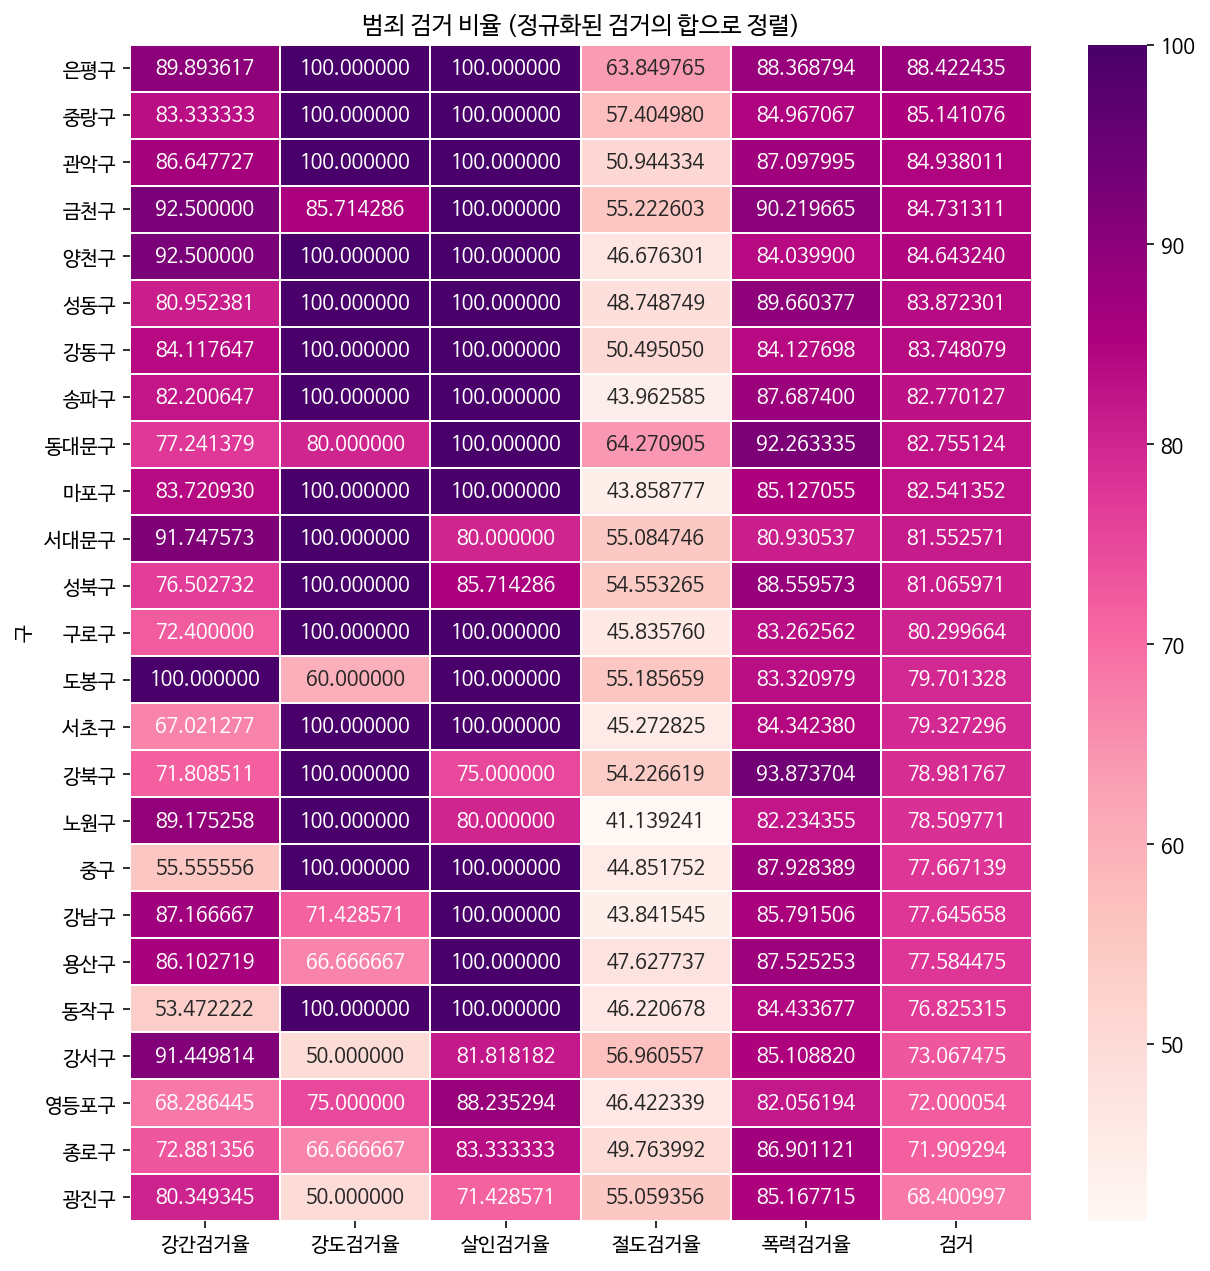

In [65]:
import seaborn as sns

target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율', '검거']

crime_gu_norm_sort = crime_gu_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_gu_norm_sort[target_col],
            annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.autoscale()
plt.tight_layout(pad=5)
plt.show()

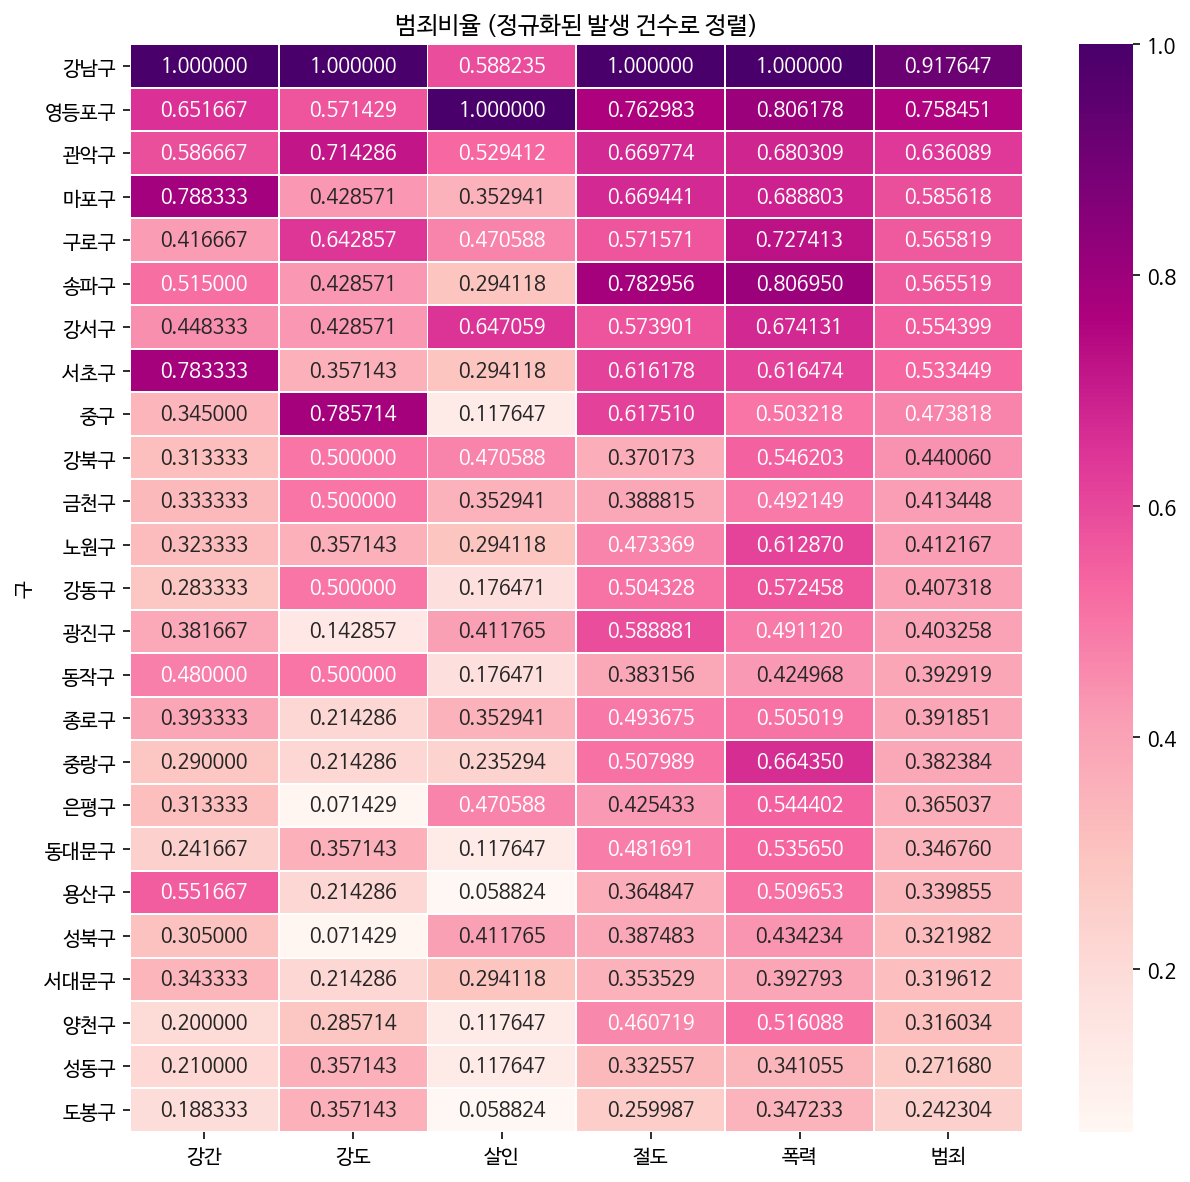

In [66]:
target_col =  target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_gu_norm_sort = crime_gu_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_gu_norm_sort[target_col],
            annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.autoscale()
plt.show()

In [67]:
crime_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,352,10,9,2012,2643,86.647727,100.000000,100.000000,50.944334,87.097995


In [0]:
crime_gu.to_csv(main_url+"/seoul_crime_result.csv", sep=',', encoding='UTF-8')